In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
main_df = pd.read_csv("/content/water_potability (1).csv")
df = main_df.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
print(df.shape)
print(df.columns)

(3276, 10)
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


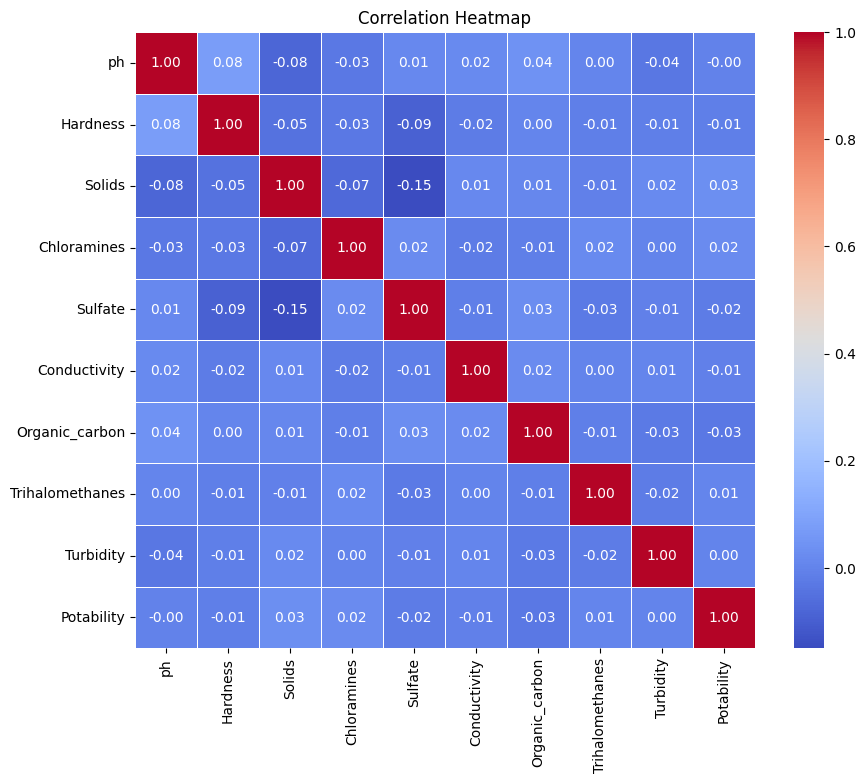

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.092766
ph        Solids            0.081884
Hardness  ph                0.075833
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.040061
dtype: float64

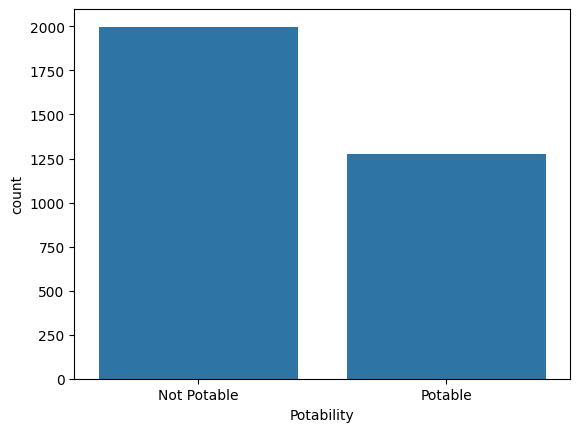

In [ ]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [ ]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    1998
1    1278
Name: Potability, dtype: int64


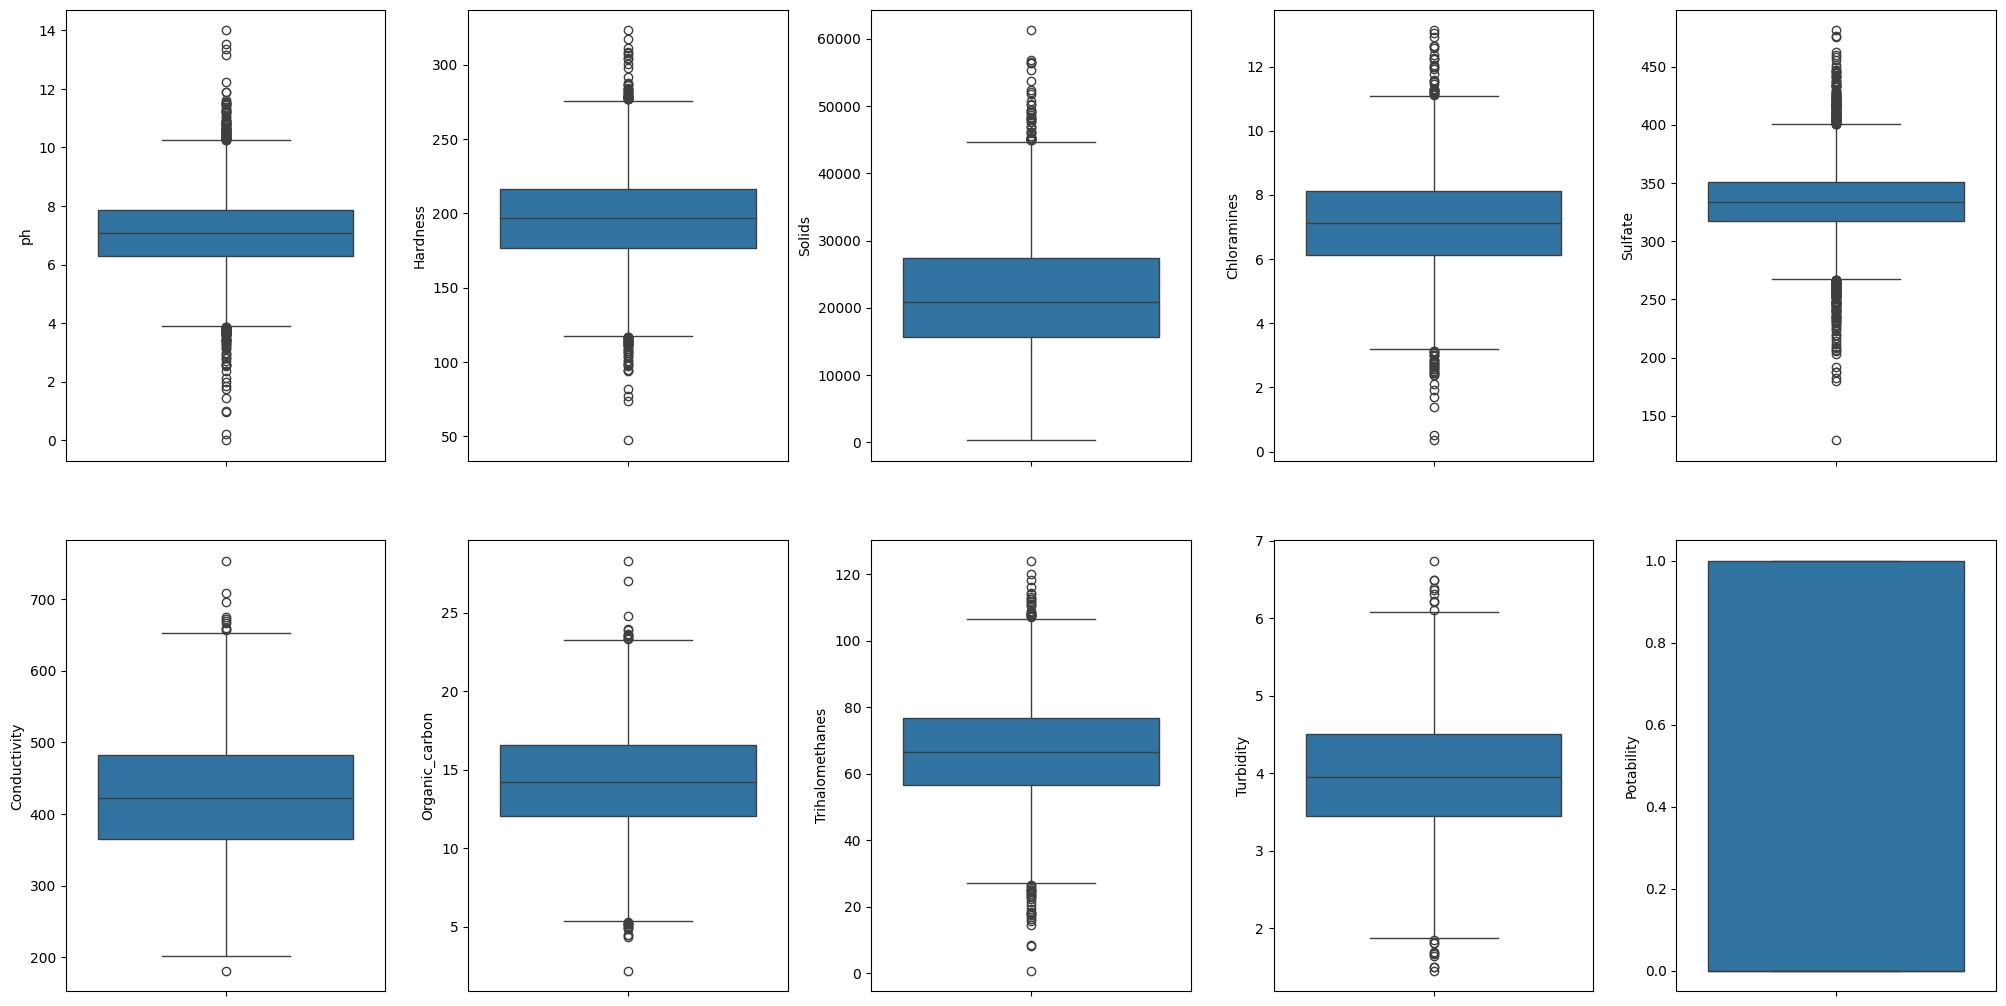

In [ ]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

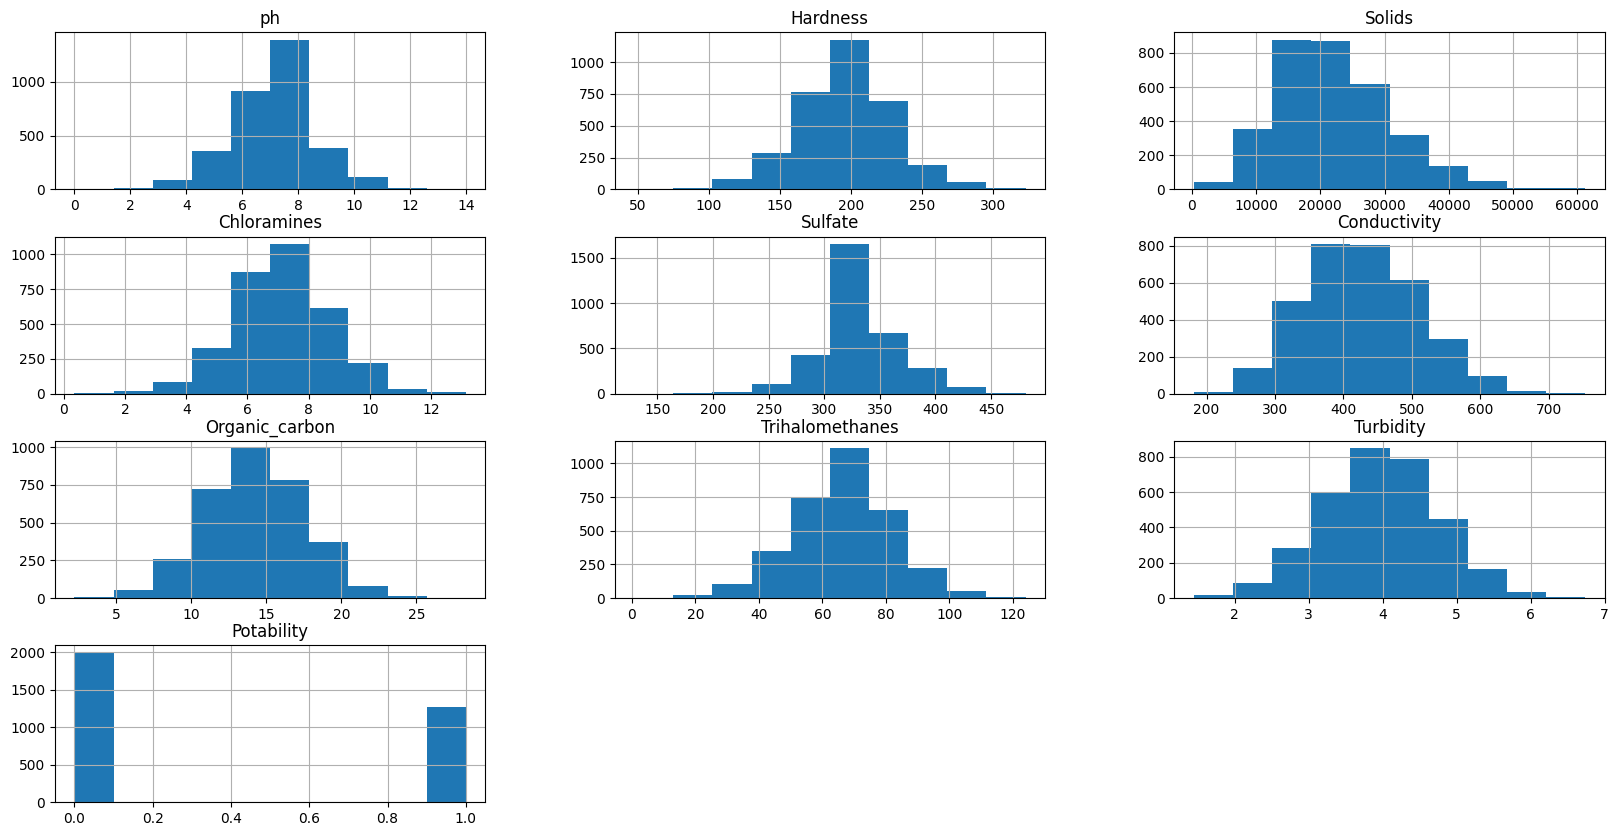

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

In [ ]:
sns.pairplot(df, hue="Potability")

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
X.shape, y.shape

((3276, 9), (3276,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = LogisticRegression(max_iter=100, random_state=42, n_jobs=4)
model.fit(X_train, y_train)


LogisticRegression(n_jobs=4, random_state=42)

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.6284658040665434


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<Axes: >

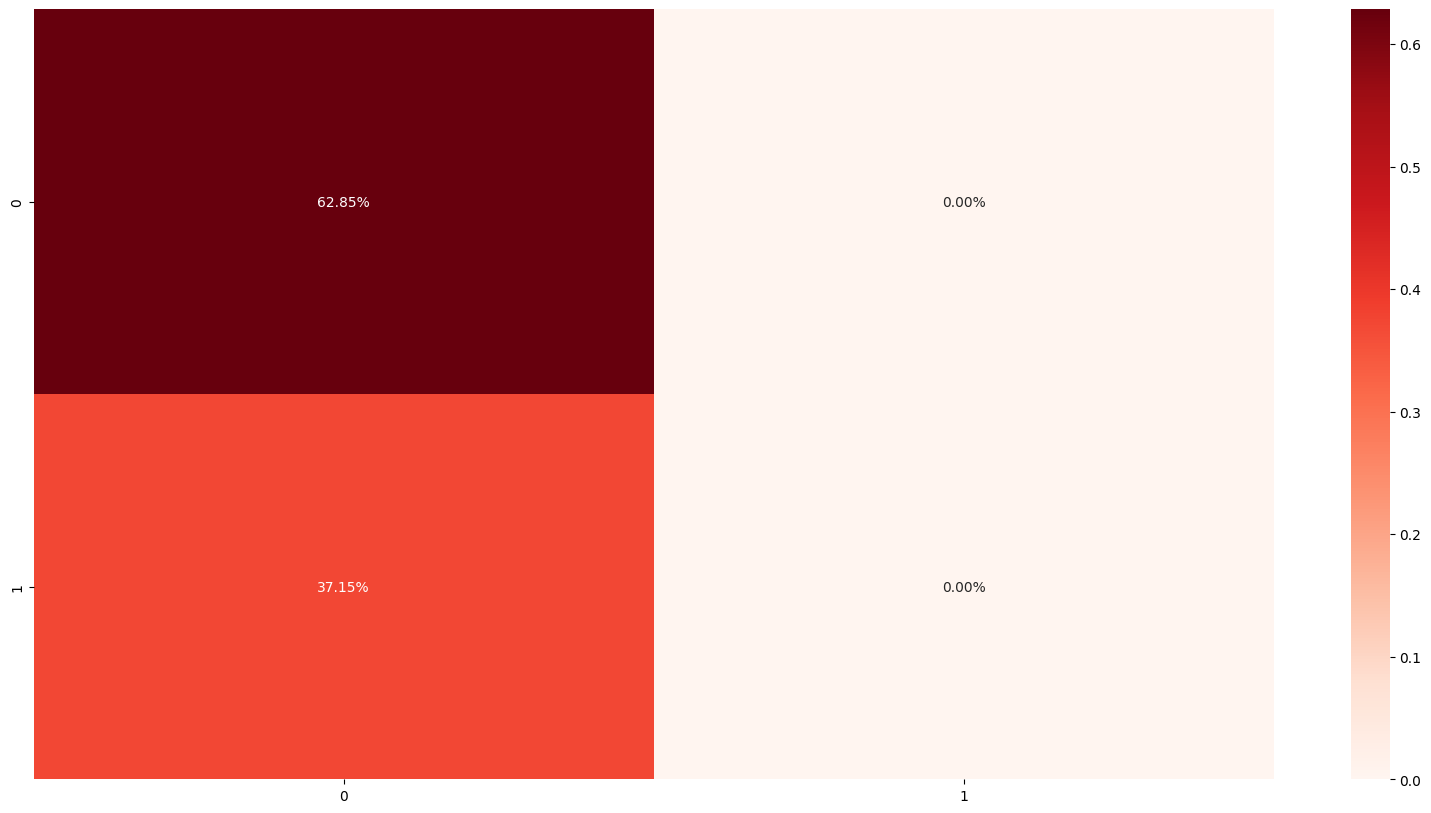

In [ ]:
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=4), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(random_state=42, n_jobs=4, **best_params_rf)
best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Best Parameters for Random Forest: {best_params_rf}")


Random Forest Accuracy: 0.6802218114602587
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


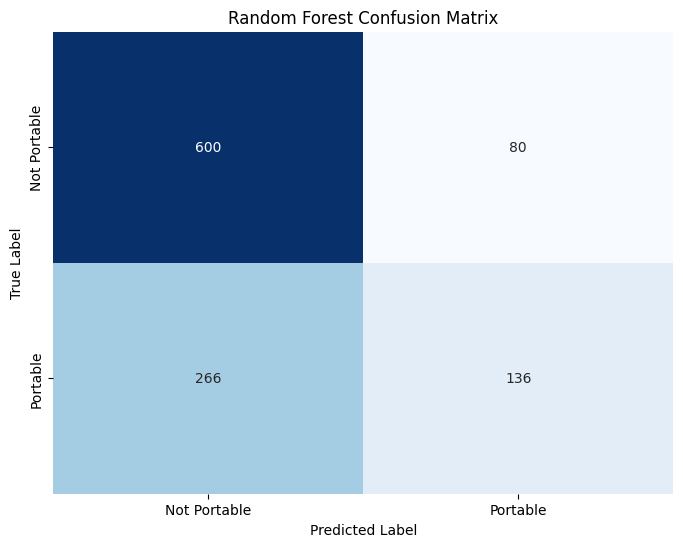

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Portable', 'Portable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

<Axes: >

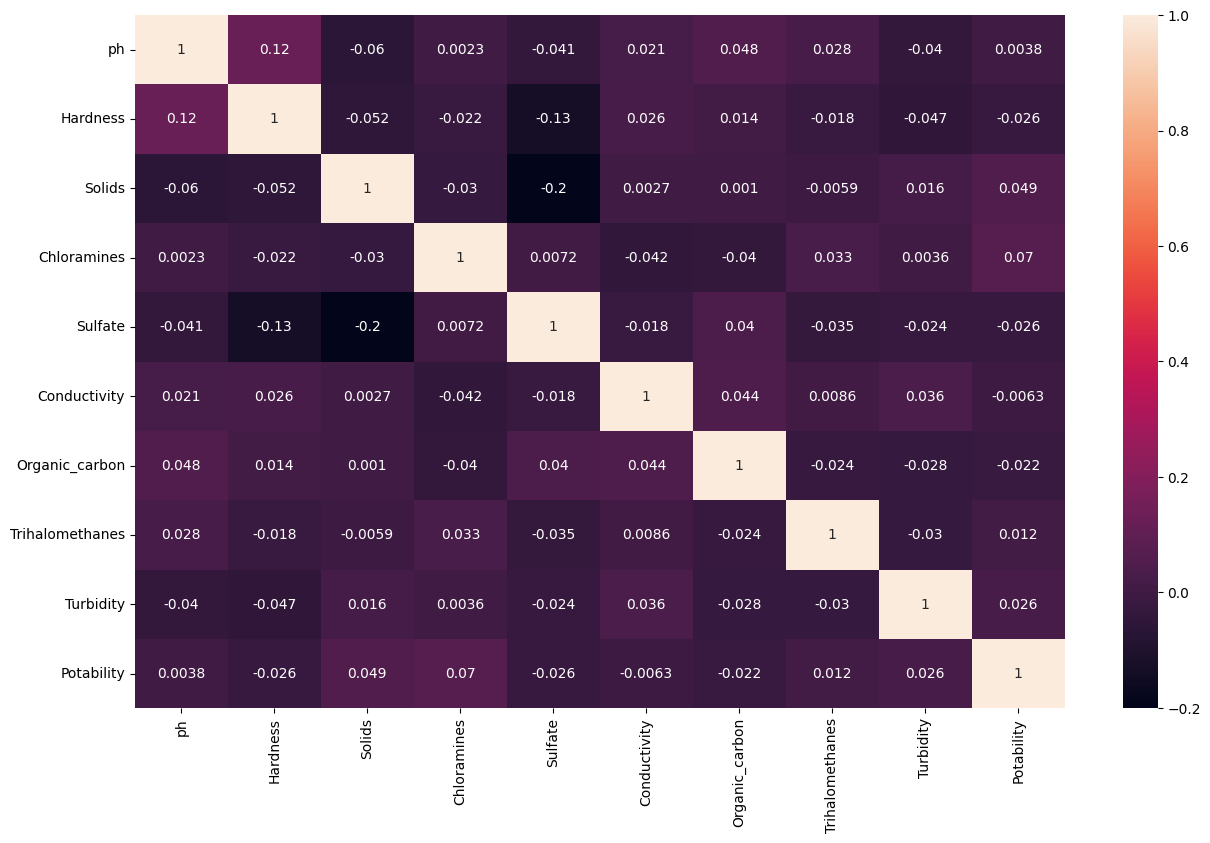

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("/content/water_potability (1).csv")
data= data.dropna()

notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200)

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True)





In [ ]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Chloramines        0.069589
Solids             0.049133
Turbidity          0.026311
Trihalomethanes    0.012046
ph                 0.003825
Conductivity      -0.006338
Organic_carbon    -0.021968
Hardness          -0.026105
Sulfate           -0.026209
Name: Potability, dtype: float64

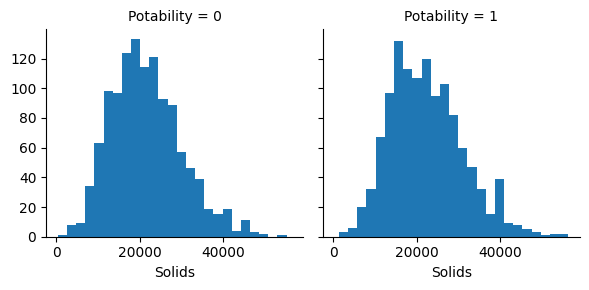

In [ ]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

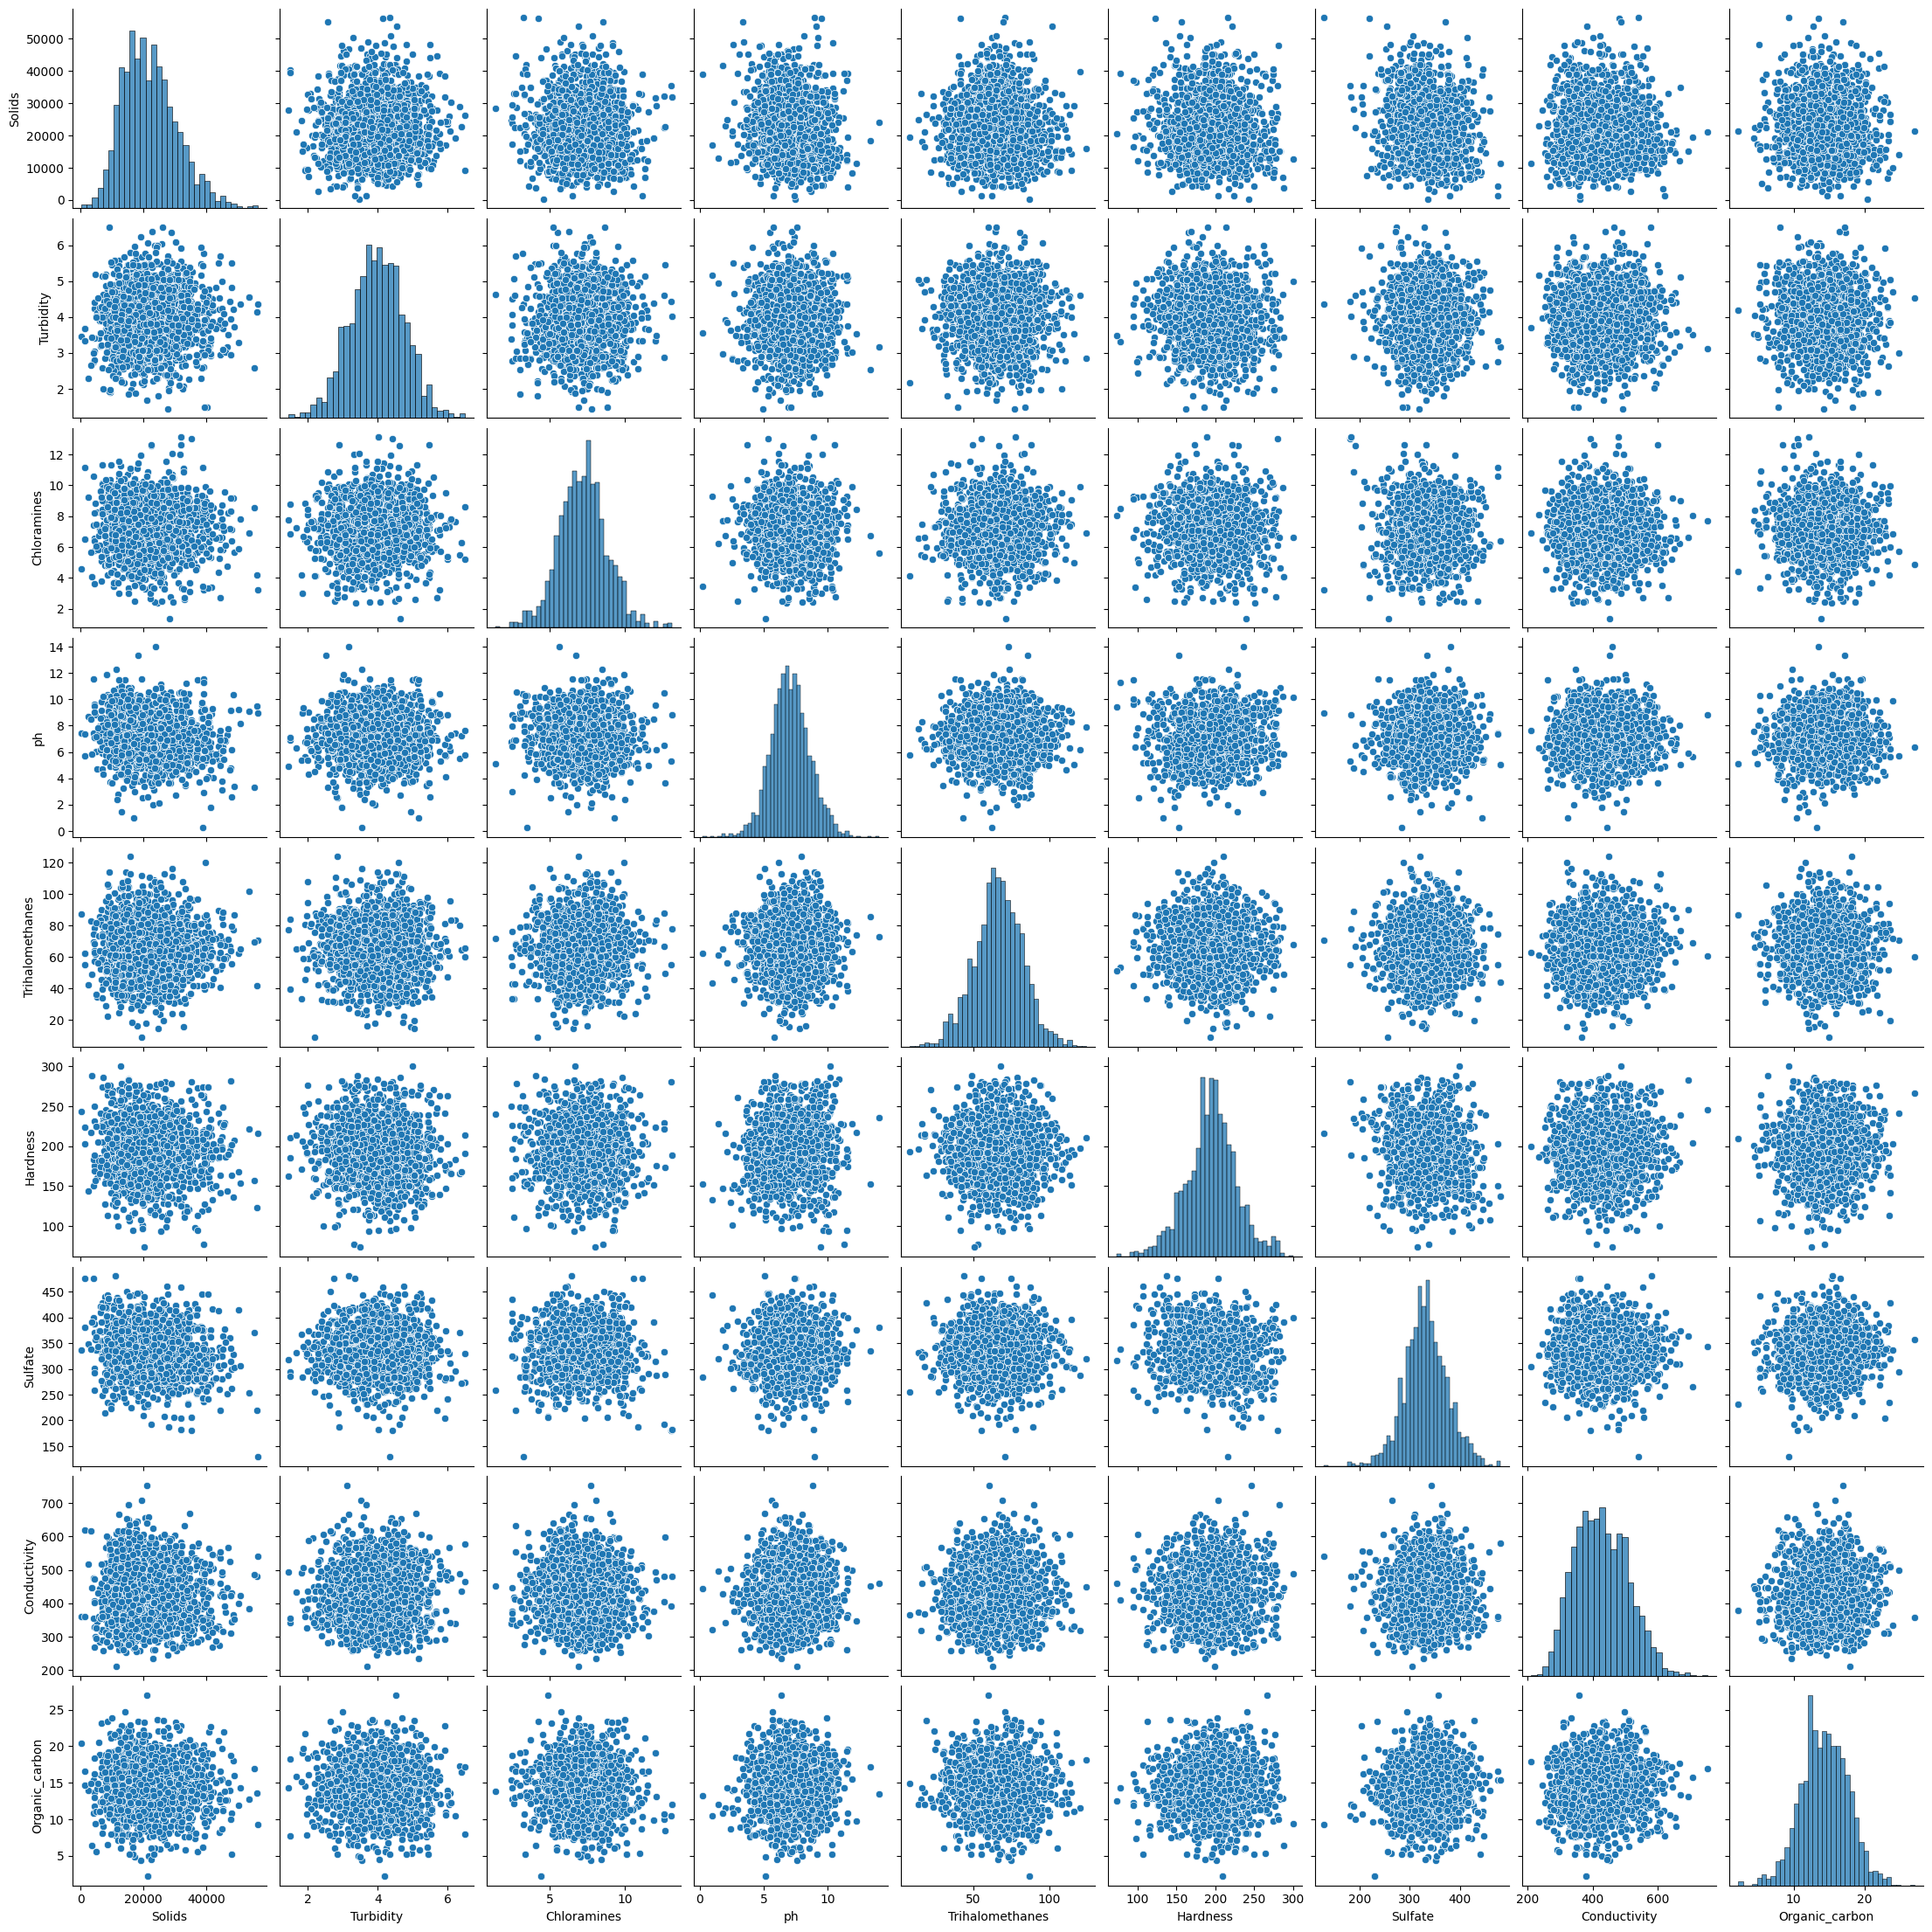

In [ ]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3159,0.531488,-1.271730,2.219755,0.767721,-0.887145,-0.893491,-0.911518,0.055087,-0.969747
2385,0.348687,-0.070282,0.389101,-0.784056,-1.129049,0.063664,-0.459814,0.912868,0.845133
332,-1.100460,1.371985,-0.447610,-1.033951,1.505724,1.532353,-0.453091,0.830273,0.256463
688,1.589285,0.629081,-0.637146,0.203604,-0.250616,0.330995,-1.407848,-0.536939,-1.724582
569,-0.867863,-0.162908,-0.721510,0.552251,-0.452310,-0.024911,0.171837,0.929720,-1.624078
...,...,...,...,...,...,...,...,...,...
2434,0.495291,1.396888,0.422014,-1.809943,-0.713641,0.193356,0.769570,1.898343,1.088118
3061,-2.007507,0.639803,2.099781,0.166130,-0.527643,-0.344709,-0.943310,1.278070,0.562486
3109,-0.513845,0.312597,-0.248780,-0.087522,-1.119725,0.552475,1.111422,-0.131589,0.654983
271,0.132030,-0.609623,0.068613,0.413801,-0.909126,-0.661205,0.926545,-0.603454,1.408785


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [ ]:
import numpy as np
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [ ]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.5}


In [ ]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))

K Nearest Neighbours : 0.66
Decision Tree : 0.76
Random Forest : 0.85
AdaBoost : 0.64
XGBoost : 0.80


In [ ]:
from sklearn.metrics import classification_report

# Assuming rf is your Random Forest model
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

# Generating the classification report
report_rf = classification_report(Y_test, y_pred_rf)
print("Classification Report for Random Forest:")
print(report_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       109
           1       0.86      0.82      0.84       131

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240

